In [1]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ptitprince as pt
from matplotlib import colors as mcolors
%matplotlib inline
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
restDir=thisDir+'data/mvpa_data/rest/'
outDir = thisDir + 'output/mL/results/ridge/acc/'
subDir=thisDir+'output/subNetwork/'
randDir=thisDir+'output/randomIdx/'
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['mem','mixed','motor']
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
sns.set_style("white")
sns.set_context("talk")
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)


MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

#same task folds dataframes
DS_violin=pd.read_csv(outDir+'DS/folds/allFolds.csv')
DS_violin['Analysis']='Diff Sub'
CV=pd.read_csv(outDir+'CV/reformedFolds.csv')
CV.drop(columns='sub', inplace=True)
CV['Analysis']='Same Sub'
frames=[DS_violin, CV]
sameTask=pd.concat(frames)


#Visualizing change scores from within to between
t_CV=pd.read_csv(outDir+'CV/acc.csv')
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[1,2,3,4])
pairCV=pd.melt(t_CV,id_vars=['sub'],value_vars=['mixed','motor','mem'], var_name='task', value_name='acc')
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Between'
pairCV['Analysis']='Within'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_mixed=pair_res[pair_res.task=='mixed']
#memory
pair_mem=pair_res[pair_res.task=='mem']

#change scores diff task same/diff sub
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[1,2,3])
SS_diff['analysis']='Within'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[1,2,3])
BS_diff['analysis']='Between'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_mixed=diff_res[diff_res.train_task=='mixed']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#plotACC of heatmaps for DS analysis
DS_heat=pd.read_csv(outDir+'DS/acc.csv', usecols=[1,2,3,4])

#different task analysis comparison does not require opening dataframe

#all statistics related tables will be computed in a separate script

#raincloud plot dataframes
#SS
SS=pd.read_csv(outDir+'SS/folds/allFolds.csv')
SS.drop(columns='test', inplace=True)
#reformate to get in long form
SS=SS.pivot_table(index = ['train',
                        SS.groupby(['train','sub']).cumcount()],
               columns = 'sub',
               values = 'acc')

SS.reset_index(inplace=True)
SS.drop(columns='level_1',inplace=True)


#subnetworks overlapped with random network sampling
SS_nets=pd.DataFrame()
DS_nets=pd.DataFrame()
CV_nets=pd.DataFrame()
BS_nets=pd.DataFrame()
for i in netList:
    tmpSS=pd.read_csv(subDir+i+'/results/ridge/acc/SS/acc.csv')
    #tmpSS['Analysis']='ridge'
    tmpSS['Network']=i
    tmpSS['Features']=netRoi[i]
    SS_nets=pd.concat([SS_nets,tmpSS])
    
    tmpDS=pd.read_csv(subDir+i+'/results/ridge/acc/DS/acc.csv')
    tmpDS['Network']=i
    tmpDS['Features']=netRoi[i]
    DS_nets=pd.concat([DS_nets,tmpDS])
    
    tmpBS=pd.read_csv(subDir+i+'/results/ridge/acc/BS/acc.csv')
    tmpBS['Network']=i
    tmpBS['Features']=netRoi[i]
    BS_nets=pd.concat([BS_nets,tmpBS])
    
    tmpCV=pd.read_csv(subDir+i+'/results/ridge/acc/CV/acc.csv')
    tmpCV=tmpCV.melt(id_vars='sub', value_vars=['mixed', 'motor','mem'], var_name='Task', value_name='Accuracy')
    tmpCV['Network']=i
    tmpCV['Features']=netRoi[i]
    CV_nets=pd.concat([CV_nets,tmpCV])
    
    
SS_nets.drop(columns='Unnamed: 0', inplace=True)
DS_nets.drop(columns='Unnamed: 0', inplace=True)
BS_nets.drop(columns='Unnamed: 0', inplace=True)
CV_nets.rename(columns={'Accuracy':'acc'},inplace=True)

rand_CV=pd.read_csv(randDir+'results/ridge/acc/CV/all.csv', usecols=[1,2,3])
rand_SS=pd.read_csv(randDir+'results/ridge/acc/SS/all.csv',usecols=[1,2,3,4,5])
rand_DS=pd.read_csv(randDir+'results/ridge/acc/DS/all.csv',usecols=[1,2,3,4,5])
rand_BS=pd.read_csv(randDir+'results/ridge/acc/BS/all.csv',usecols=[1,2,3,4,5,6])
#netRoi
#netRoi
SStotal=[]
DStotal=[]
CVtotal=[]
BStotal=[]
for i in netList:
    #CV
    CVtmp=CV_nets[(CV_nets['Network']==i)].acc.values
    CVacc=CVtmp.mean()
    CVtotal.append(CVacc)
    #SS
    SStmp=SS_nets[(SS_nets['Network']==i)].acc.values
    SSacc=SStmp.mean()
    SStotal.append(SSacc)
    #DS
    DStmp=DS_nets[(DS_nets['Network']==i)].acc.values
    DSacc=DStmp.mean()
    DStotal.append(DSacc)
    #BS
    BStmp=BS_nets[(BS_nets['Network']==i)].acc.values
    BSacc=BStmp.mean()
    BStotal.append(BSacc)

CV_mu=pd.DataFrame({'Network':netList, 'Acc':CVtotal,'Features':feature})
SS_mu=pd.DataFrame({'Network':netList, 'Acc':SStotal,'Features':feature})
DS_mu=pd.DataFrame({'Network':netList, 'Acc':DStotal,'Features':feature})
BS_mu=pd.DataFrame({'Network':netList, 'Acc':BStotal,'Features':feature})

#Subnetwork pointplots testing against the null model
#Relative percent difference for within/between relative to Null 
SS_netNull=pd.DataFrame()
DS_netNull=pd.DataFrame()
CV_netNull=pd.DataFrame()
BS_netNull=pd.DataFrame()
for key in netRoi.keys():
    tmpSS=pd.read_csv(randDir+'/results/ridge/acc/SS/'+str(netRoi[key])+'.csv')
    #tmpSS['Analysis']='ridge'
    tmpSS['Network']=key
    tmpSS['Features']=netRoi[key]
    SS_netNull=pd.concat([SS_netNull,tmpSS])
    
    tmpDS=pd.read_csv(randDir+'/results/ridge/acc/DS/'+str(netRoi[key])+'.csv')
    tmpDS['Network']=key
    tmpDS['Features']=netRoi[key]
    DS_netNull=pd.concat([DS_netNull,tmpDS])
    
    tmpBS=pd.read_csv(randDir+'/results/ridge/acc/BS/'+str(netRoi[key])+'.csv')
    tmpBS['Network']=key
    tmpBS['Features']=netRoi[key]
    BS_netNull=pd.concat([BS_netNull,tmpBS])
    
    tmpCV=pd.read_csv(randDir+'/results/ridge/acc/CV/'+str(netRoi[key])+'.csv')
    tmpCV=tmpCV.melt(id_vars='sub', value_vars=['mixed', 'motor','mem'], var_name='Task', value_name='Accuracy')
    tmpCV['Network']=key
    tmpCV['Features']=netRoi[key]
    CV_netNull=pd.concat([CV_netNull,tmpCV])
CV_netNull.rename(columns={'Accuracy':'acc'},inplace=True)

                    
SStotalNull=[]
DStotalNull=[]
CVtotalNull=[]
BStotalNull=[]
for i in netList:
    #CV
    CVtmp=CV_netNull[(CV_netNull['Network']==i)].acc.values
    CVacc=CVtmp.mean()
    CVtotalNull.append(CVacc)
    #SS
    SStmp=SS_netNull[(SS_netNull['Network']==i)].acc.values
    SSacc=SStmp.mean()
    SStotalNull.append(SSacc)
    #DS
    DStmp=DS_netNull[(DS_netNull['Network']==i)].acc.values
    DSacc=DStmp.mean()
    DStotalNull.append(DSacc)
    #BS
    BStmp=BS_netNull[(BS_netNull['Network']==i)].acc.values
    BSacc=BStmp.mean()
    BStotalNull.append(BSacc)

CV_muNull=pd.DataFrame({'Network':netList, 'Acc':CVtotalNull,'Features':feature})
SS_muNull=pd.DataFrame({'Network':netList, 'Acc':SStotalNull,'Features':feature})
DS_muNull=pd.DataFrame({'Network':netList, 'Acc':DStotalNull,'Features':feature})
BS_muNull=pd.DataFrame({'Network':netList, 'Acc':BStotalNull,'Features':feature})


#calculate relative percent difference, null=referene
#CV
CV_rel_per_diff=CV_mu[['Network','Features']]
CV_rel_per_diff['acc']=(CV_mu.Acc-CV_muNull.Acc)/(CV_muNull.Acc)
CV_rel_per_diff['Analysis']='Within'
#SS
SS_rel_per_diff=SS_mu[['Network','Features']]
SS_rel_per_diff['acc']=(SS_mu.Acc-SS_muNull.Acc)/(SS_muNull.Acc)
SS_rel_per_diff['Analysis']='Within'
#DS
DS_rel_per_diff=DS_mu[['Network','Features']]
DS_rel_per_diff['acc']=(DS_mu.Acc-DS_muNull.Acc)/(DS_muNull.Acc)
DS_rel_per_diff['Analysis']='Between'
#BS
BS_rel_per_diff=BS_mu[['Network','Features']]
BS_rel_per_diff['acc']=(BS_mu.Acc-BS_muNull.Acc)/(BS_muNull.Acc)
BS_rel_per_diff['Analysis']='Between'

#Now combine
same_task_per_diff=pd.concat([CV_rel_per_diff,DS_rel_per_diff])
diff_task_per_diff=pd.concat([SS_rel_per_diff,BS_rel_per_diff])


#zscored subnetworks
CV_z=pd.read_csv(randDir+'results/ridge/acc/CV/zscore_all.csv')
SS_z=pd.read_csv(randDir+'results/ridge/acc/SS/zscore_all.csv')
DS_z=pd.read_csv(randDir+'results/ridge/acc/DS/zscore_all.csv')
BS_z=pd.read_csv(randDir+'results/ridge/acc/BS/zscore_all.csv')

CV_z['Analysis']='Within'
SS_z['Analysis']='Within'
DS_z['Analysis']='Between'
BS_z['Analysis']='Between'

ST_z=pd.concat([CV_z, DS_z])
DT_z=pd.concat([SS_z,BS_z])


#adding thinner lines to different task analysis figure
t_SS=pd.read_csv(outDir+'SS/acc.csv',usecols=[1,2,3,4])
t_BS=pd.read_csv(outDir+'BS/acc.csv',usecols=[1,2,3,4,5])


pairBS=pd.DataFrame()
for task in taskList:
    for test_task in taskList:
        if task==test_task:
            continue
        else:
            tmp=t_BS[(t_BS.train_task==task)&(t_BS.test_task==test_task)]
            tmp_mu=tmp.groupby(['train_sub']).mean()
            tmp_mu['train_task']=task
            tmp_mu['test_task']=test_task
            pairBS=pd.concat([pairBS,tmp_mu])
pairBS.reset_index(inplace=True)
pairBS.rename(columns={'train_sub':'sub'},inplace=True)
pairBS['Analysis']='Between'


t_SS['Analysis']='Within'
DT_sep=pd.concat([pairBS, t_SS])

#motor
DT_motor=DT_sep[DT_sep.train_task=='motor']

DT_motor_mem=DT_motor[DT_motor.test_task=='mem']
DT_motor_mix=DT_motor[DT_motor.test_task=='mixed']
#mixed
DT_mixed=DT_sep[DT_sep.train_task=='mixed']

DT_mixed_mot=DT_mixed[DT_mixed.test_task=='motor']
DT_mixed_mem=DT_mixed[DT_mixed.test_task=='mem']
#memory
DT_mem=DT_sep[DT_sep.train_task=='mem']

DT_mem_mot=DT_mem[DT_mem.test_task=='motor']
DT_mem_mix=DT_mem[DT_mem.test_task=='mixed']

In [113]:
#distribution of accuracy between folds DS vs CV
"""
sns.set_context('talk')
plt.figure(figsize=(15,8))
g=sns.violinplot(x='task', y='acc', hue='Analysis', data=sameTask, split=True)
g.set_xlabel('Task')
g.set(ylim=(0))
g.set_title('Distribution of Accuracy Across Folds')
plt.savefig(thisDir+'output/mL/images/ridge/figs/violin_plots.png', bbox_inches='tight')
"""

"\nsns.set_context('talk')\nplt.figure(figsize=(15,8))\ng=sns.violinplot(x='task', y='acc', hue='Analysis', data=sameTask, split=True)\ng.set_xlabel('Task')\ng.set(ylim=(0))\ng.set_title('Distribution of Accuracy Across Folds')\nplt.savefig(thisDir+'output/mL/images/ridge/figs/violin_plots.png', bbox_inches='tight')\n"

Text(0.5, 0, '')

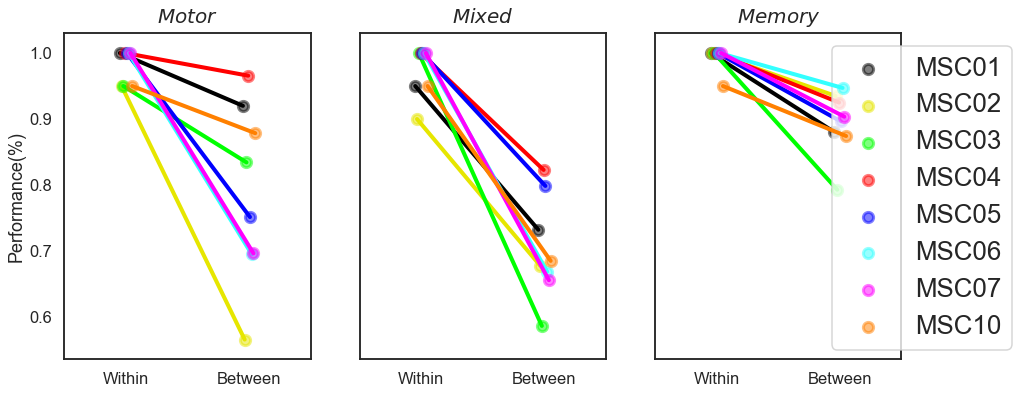

In [114]:
#Create figure space
fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)

# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor,ax=ax1,dodge=.1,order=['Within','Between'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.setp(ax.collections, alpha=.5) 
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
plt.xlabel('')
plt.ylabel("Performance(%)")
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mixed, ax=ax2, dodge=.1,order=['Within','Between'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.setp(ax.collections, alpha=.5)
ax.legend_.remove()
ax.set_title('$Mixed$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, dodge=.1,order=['Within','Between'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.setp(ax.collections, alpha=.5)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set_title('$Memory$', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')

#plt.savefig(thisDir+'output/mL/images/ridge/figs/point_plots.png', bbox_inches='tight')




In [ ]:
plt.figure(figsize=(10,5))
diff_plot=sns.pointplot(x="analysis",y="Mean", hue="train_task", ci=None, data=diff_res)
plt.legend(loc='lower right',fontsize='medium')
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Performance(%)")
diff_plot.set_title('Different Task Analysis', fontsize=20, pad=10)
diff_plot.set(xlabel=' ')
plt.savefig(thisDir+'output/mL/images/ridge/figs/taskpoint_plots.png', bbox_inches='tight')

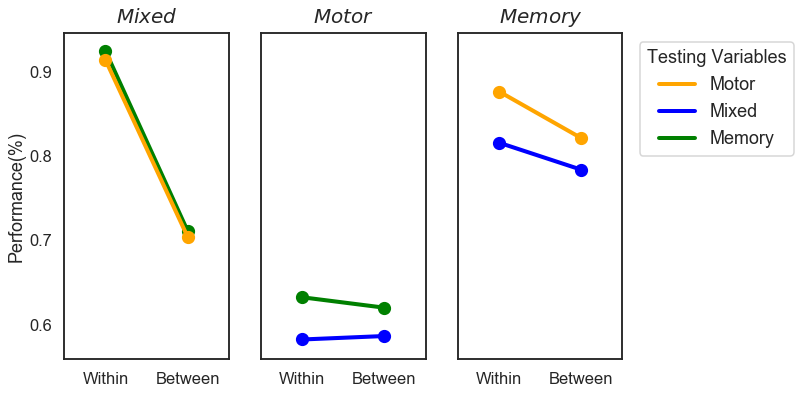

In [54]:
#separating out the different tasks 
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",palette=['green','orange'], ci=None, data=diff_mixed, ax=ax1)
ax.legend_.remove()
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Performance(%)")
ax.set_title('$Mixed$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#Motor
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['green','blue'], data=diff_motor, ax=ax2)
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
#Memory
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['blue','orange'], data=diff_mem, ax=ax3)
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Motor', 'Mixed', 'Memory'],loc='upper right',fontsize='medium',bbox_to_anchor=(2.1, 1),title='Testing Variables')
#plt.savefig(thisDir+'output/mL/images/ridge/figs/sep_taskpoint_plots.png', bbox_inches='tight')

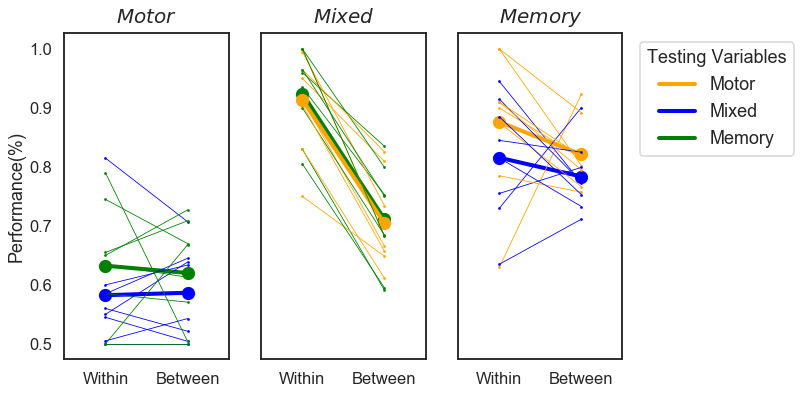

In [49]:
#separating out the different tasks and adding in separate individuals
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['green','blue'], data=diff_motor, ax=ax1)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_motor_mix, palette=['blue'],ax=ax1)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_motor_mem, palette=['green'],ax=ax1)
g2.legend_.remove()
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
plt.ylabel("Performance(%)")


#Mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",palette=['green','orange'], ci=None, data=diff_mixed, ax=ax2)
ax.legend_.remove()
#add thin lines
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_mixed_mem, palette=['green'],ax=ax2)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_mixed_mot, palette=['orange'],ax=ax2)
g2.legend_.remove()
ax.set(ylabel=' ')
ax.set_title('$Mixed$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#Memory
ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['blue','orange'], data=diff_mem, ax=ax3)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_mem_mot,palette=['orange'], ax=ax3)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Within','Between'], ci=None,scale=.2, data=DT_mem_mix, palette=['blue'],ax=ax3)
g2.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.set(xlabel=' ')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Motor', 'Mixed', 'Memory'],loc='upper right',fontsize='medium',bbox_to_anchor=(2.1, 1),title='Testing Variables')
#plt.savefig(thisDir+'output/mL/images/ridge/figs/sepSubs_taskpoint_plots.png', bbox_inches='tight')

In [ ]:
#maybe edit this later to include all code so saved all in figs file
#figure of heatmaps across subjects
classification.plotACC(DS_heat, 'ridge', 'DS')
#heatmaps comparison of BS v SS
classification.heatmaps('ridge', 'SS')
classification.heatmaps('ridge', 'BS')

In [ ]:
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 4 columns
gs = gridspec.GridSpec(nrows=2, ncols=4)
#gs = gridspec.GridSpec(nrows=4, ncols=2)
#MSC01
ax1=fig.add_subplot(gs[0,0])
dx='train'; dy='MSC01'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax1)
ax.tick_params(labelsize=30)
ax.set_title('$MSC01$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC02
ax2=fig.add_subplot(gs[0,1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
dx='train'; dy='MSC02'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax2)
ax.tick_params(labelsize=30)
ax.set_title('$MSC02$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC03
ax3=fig.add_subplot(gs[0,2], sharey=ax1)
#ax3=fig.add_subplot(gs[1,0], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
dx='train'; dy='MSC03'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax3)
ax.tick_params(labelsize=30)
ax.set_title('$MSC03$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC04
ax4=fig.add_subplot(gs[0,3], sharey=ax1)
#ax4=fig.add_subplot(gs[1,1], sharey=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
dx='train'; dy='MSC04'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax4)
ax.tick_params(labelsize=30)
ax.set_title('$MSC04$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)


#MSC05
ax5=fig.add_subplot(gs[1,0])
#ax5=fig.add_subplot(gs[2,0])
dx='train'; dy='MSC05'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax5)
ax.tick_params(labelsize=30)
ax.set_title('$MSC05$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC06
ax6=fig.add_subplot(gs[1,1], sharey=ax5)
#ax6=fig.add_subplot(gs[2,1], sharey=ax5)
plt.setp(ax6.get_yticklabels(), visible=False)
dx='train'; dy='MSC06'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax6)
ax.tick_params(labelsize=30)
ax.set_title('$MSC06$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC07
ax7=fig.add_subplot(gs[1,2], sharey=ax5)
#ax7=fig.add_subplot(gs[3,0], sharey=ax5)
plt.setp(ax7.get_yticklabels(), visible=False)
dx='train'; dy='MSC07'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax7)
ax.tick_params(labelsize=30)
ax.set_title('$MSC07$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC10
ax8=fig.add_subplot(gs[1,3], sharey=ax5)
#ax8=fig.add_subplot(gs[3,1], sharey=ax5)
plt.setp(ax8.get_yticklabels(), visible=False)
dx='train'; dy='MSC10'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax8)
ax.tick_params(labelsize=30)
ax.set_title('$MSC10$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

plt.savefig(thisDir+'output/mL/images/ridge/figs/raincloud_plots.png', bbox_inches='tight')

In [ ]:
#lineplots overlapping subnetwork analysis
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2)

#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax1)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=CV_mu, ax=ax1, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
#g.legend(loc='lower right')
ax.set_title('Same Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#DS
ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax2)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=DS_mu, ax=ax2, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g.legend(loc='lower right')
ax.set_title('Different Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
plt.legend(bbox_to_anchor=(1.3, -0.05),loc='lower right',fontsize='xx-large')

#SS
ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax3)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=SS_mu, ax=ax3, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g.legend(loc='lower right')
ax.set_title('Same Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel("Performance(%)", fontsize=30)
ax.set_xlabel('Number of Features',fontsize=30)
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax4)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=BS_mu, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
#fig.text(0.075, 0.5, "Performance(%)", rotation="vertical", va="center", fontsize="30")
#fig.text(0.45, 0.07, 'Number of Features', rotation="horizontal", va="center", fontsize="30")
plt.savefig(thisDir+'output/mL/images/ridge/figs/feature_plots.png', bbox_inches='tight')

In [ ]:
#lineplots random feature selection comparison of within and between 
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=1)

#Same task comparison within and between 
ax1=fig.add_subplot(gs[0,0])
plt.setp(ax1.get_xticklabels(), visible=False)
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax1)
ax.set(xscale="log")
g = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax1)
ax.set_title('Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#Diff task comparison within and between
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax2)
g = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax2)
ax.set(xscale="log")
ax.set_title('Different Task',fontsize=40, pad=10)
ax.set_ylabel("Performance(%)", fontsize=30)
ax.set_xlabel('Number of Features',fontsize=30)
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
ax.legend(('Within', 'Between'),loc='upper right',fontsize='xx-large')
plt.savefig(thisDir+'output/mL/images/ridge/figs/comb_feature_plots.png', bbox_inches='tight')

In [ ]:
#Subnetwork relative percent diff

#Create figure space
fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="Network", ci=None, data=same_task_per_diff,order=['Within','Between'], palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],ax=ax1)
ax.set_title('Same Task',fontsize=35, pad=10)
ax.set_ylabel('Percent Change $\%$', fontsize=30)
ax.set_xlabel('')
ax.legend_.remove()
ax.set(ylim=(-.3, .1))
y=[-.3,-.2,-.1,0,.1]
plt.yticks(y)
ax.tick_params(labelsize=30)

ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="Network", ci=None, data=diff_task_per_diff,order=['Within','Between'], palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],ax=ax2)
ax.set_title('Different Task',fontsize=35, pad=10)
plt.legend(bbox_to_anchor=(1.5, -0.05),loc='lower right',fontsize='medium')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=30)
plt.savefig(thisDir+'output/mL/images/ridge/figs/subnet_relNull_pointplots.png', bbox_inches='tight')


No handles with labels found to put in legend.


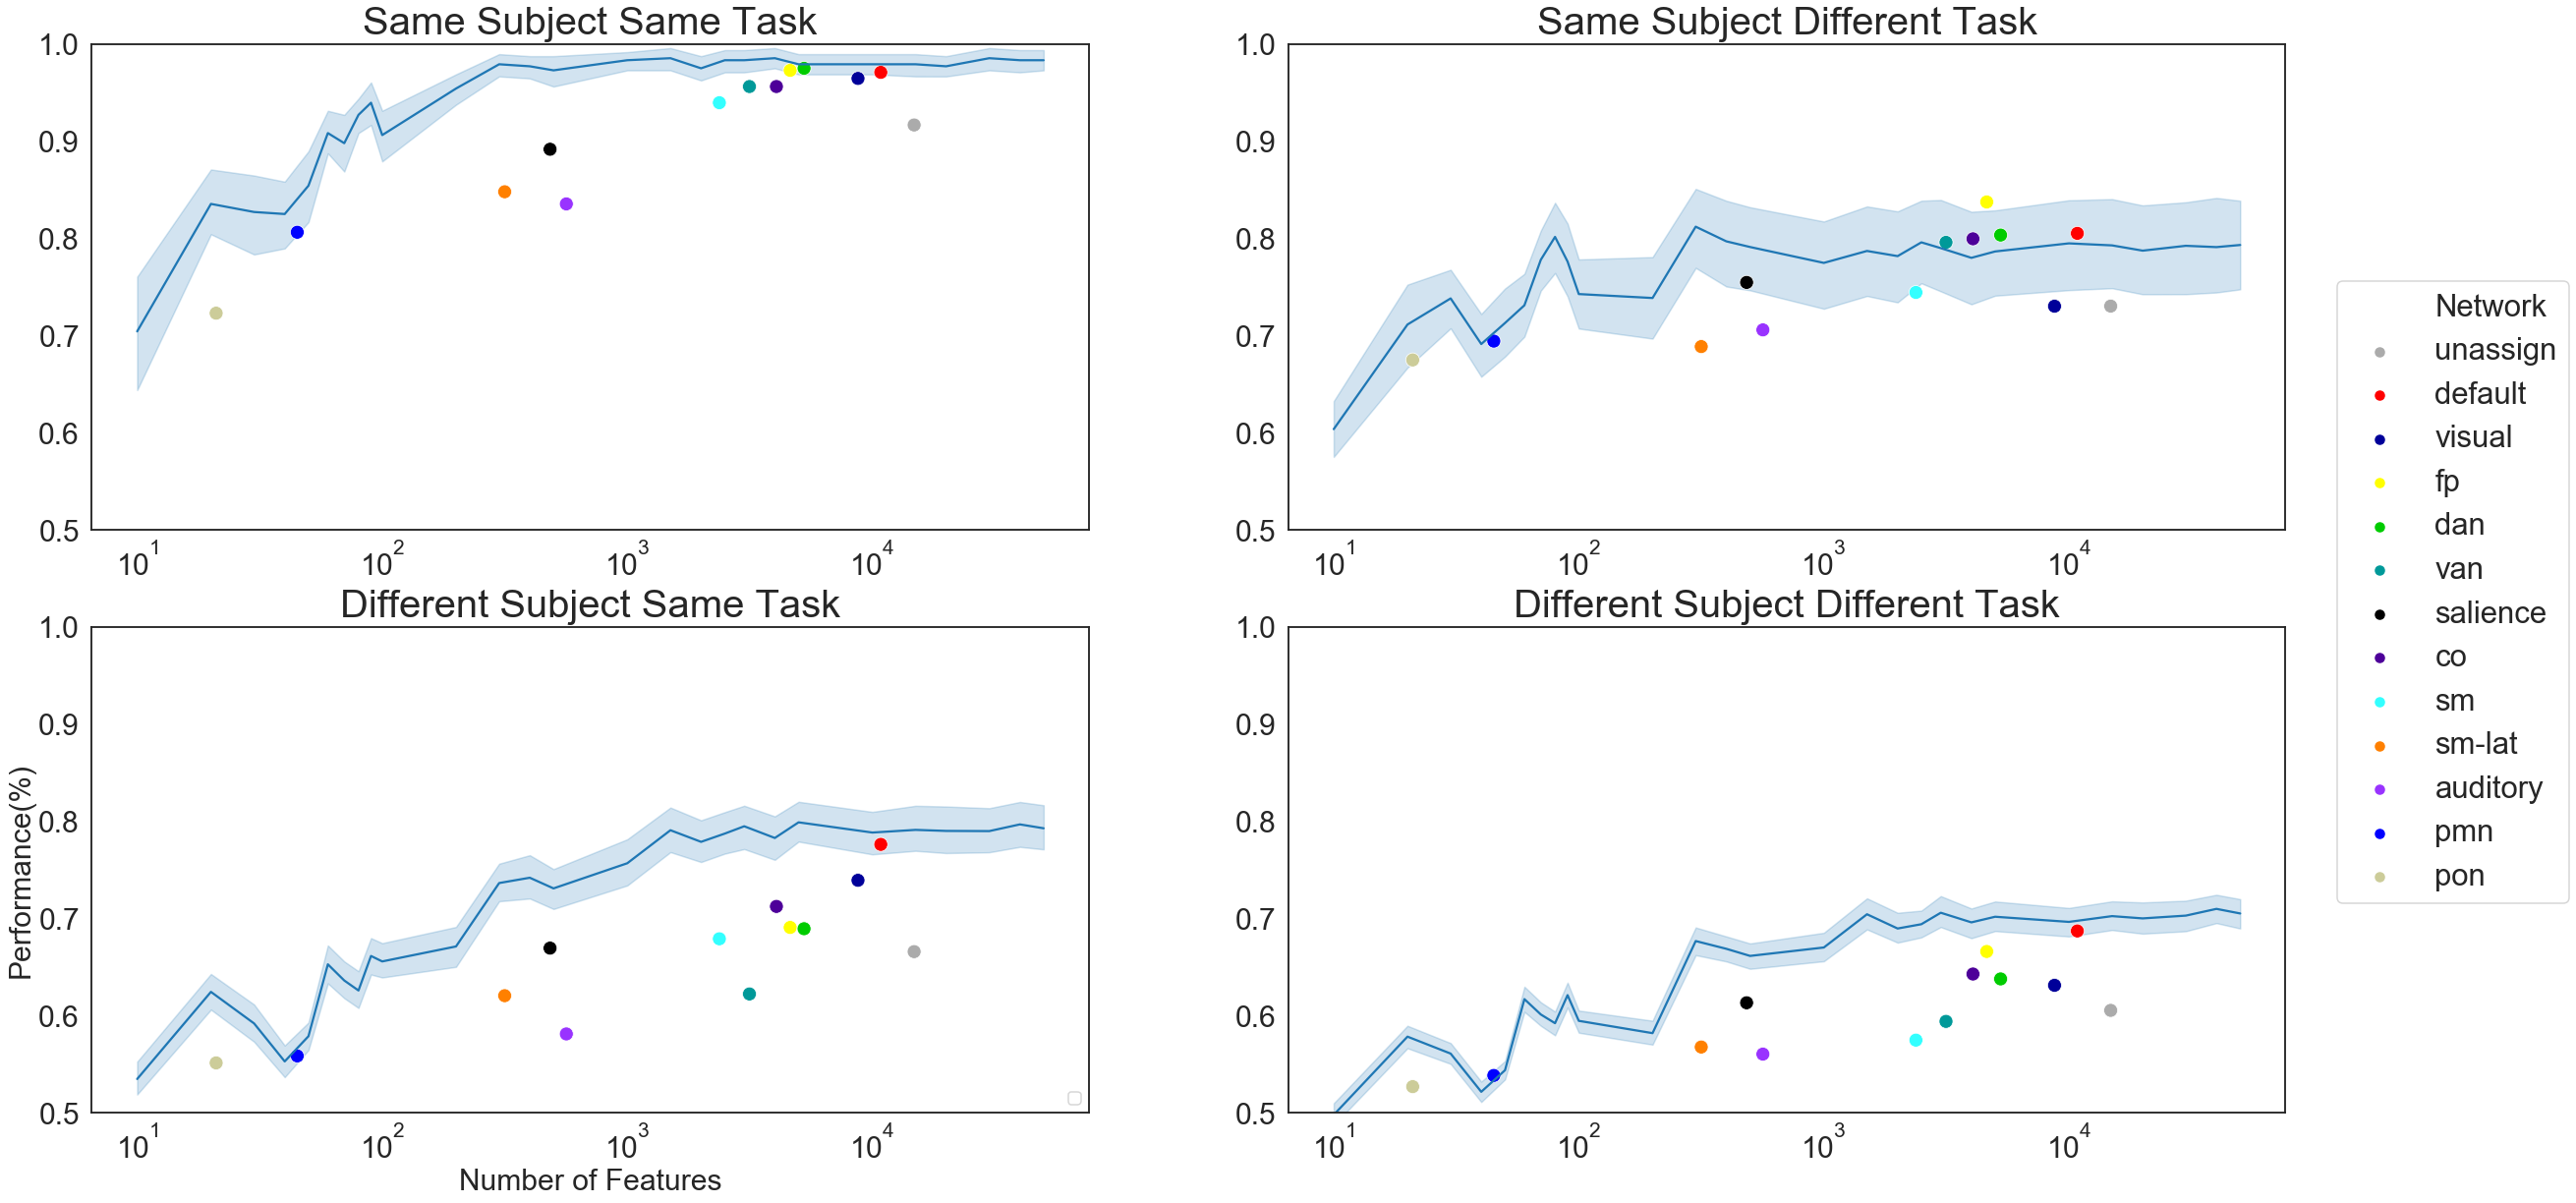

In [14]:
#########
#Using feature plots but including the null features
#lineplots overlapping subnetwork analysis
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2)

#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Features", y="Accuracy",data=rand_CV, ax=ax1)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=CV_mu, ax=ax1, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
#gg=sns.scatterplot(x='Features', y='Acc', hue='Network', data=CV_muNull, marker="x", ax=ax1, color='r',s=600,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])


ax.set_title('Same Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#DS
#ax2=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="Features", y="acc",data=rand_DS, ax=ax2)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=DS_mu, ax=ax2, color='r',legend=False,s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g.legend(loc='lower right')
#gg=sns.scatterplot(x='Features', y='Acc', hue='Network', data=DS_muNull,  marker="x", legend=False,ax=ax2, color='r',s=600,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Same Task',fontsize=40, pad=10)
ax.set_ylabel("Performance(%)", fontsize=30)
ax.set_xlabel('Number of Features',fontsize=30)
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)


#SS
#ax3=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_SS, ax=ax3)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=SS_mu, ax=ax3, color='r',s=200,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
#gg=sns.scatterplot(x='Features', y='Acc', hue='Network', data=SS_muNull, marker="x",ax=ax3, color='r',s=600,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.3, -.8),loc='lower right',fontsize='xx-large')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)

#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="Features", y="acc",data=rand_BS, ax=ax4)
ax.set(xscale="log")
g=sns.scatterplot(x='Features', y='Acc', hue='Network', data=BS_mu, ax=ax4, color='r',s=200,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
#gg=sns.scatterplot(x='Features', y='Acc', hue='Network', data=BS_muNull,marker="x", ax=ax4, color='r',s=600,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Subject Different Task',fontsize=40, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.5, 1))
ax.tick_params(labelsize=30)
#fig.text(0.075, 0.5, "Performance(%)", rotation="vertical", va="center", fontsize="30")
#fig.text(0.45, 0.07, 'Number of Features', rotation="horizontal", va="center", fontsize="30")
plt.savefig(thisDir+'output/mL/images/ridge/figs/Null_feature_plots.png', bbox_inches='tight')

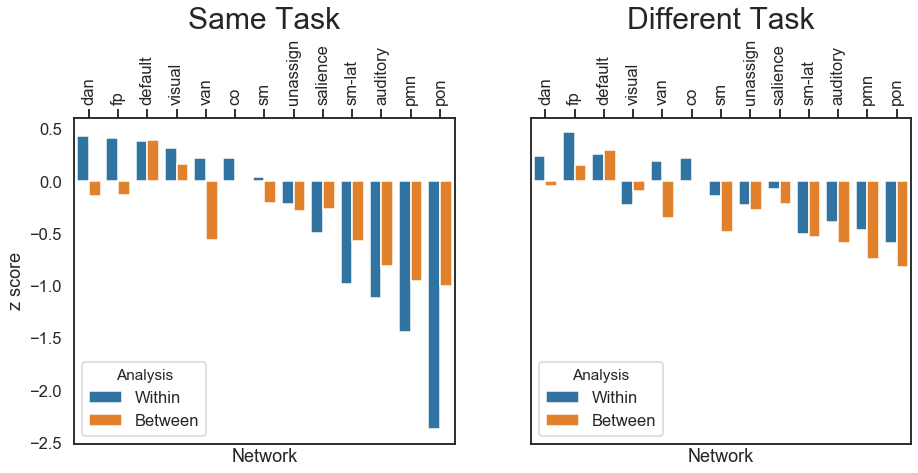

In [3]:
#subnet z score null bar plots

fig=plt.figure(figsize=(15,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2)
ax1=fig.add_subplot(gs[0,0])
ax=sns.barplot(x='Network', y='z_score', hue='Analysis', data=ST_z,ax=ax1, order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])
ax.set_title('Same Task',fontsize=30, pad=10)
ax.xaxis.tick_top()
plt.ylabel('z score')
plt.xticks(rotation='vertical')


gs = gridspec.GridSpec(nrows=1, ncols=2)
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.barplot(x='Network', y='z_score', hue='Analysis', data=DT_z,ax=ax2, order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])
ax.set_title('Different Task',fontsize=30, pad=10)
ax.xaxis.tick_top()
plt.xticks(rotation='vertical')
plt.ylabel(' ')
plt.savefig(thisDir+'output/mL/images/ridge/figs/zscore_feature_plots.png', bbox_inches='tight')



In [91]:
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)


In [92]:
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)


In [94]:
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

In [95]:
motTmem

,train_sub,Analysis,acc
0,MSC01,Diff,0.727143
1,MSC02,Diff,0.500000
2,MSC03,Diff,0.570714
3,MSC04,Diff,0.708571
4,MSC05,Diff,0.504286
5,MSC06,Diff,0.670000
6,MSC07,Diff,0.667857
7,MSC10,Diff,0.612857
8,MSC01,Same,0.920000
9,MSC02,Same,0.565714


In [100]:
#Visualizing change scores from within to between
#CV-SS
allTaskDir=thisDir + 'output/mL_allTask/results/ridge/acc/'
CV=pd.read_csv(allTaskDir+'CV/acc.csv')
BS=pd.read_csv(allTaskDir+'BS/acc.csv', usecols=[1,2,3,4,5])
SS=pd.read_csv(allTaskDir+'SS/acc.csv', usecols=[1,2,3,4])
DS=pd.read_csv(allTaskDir+'DS/acc.csv', usecols=[1,2,3,4])
CV=pd.melt(CV,id_vars=['sub'],value_vars=['glass','semantic','motor','mem'], var_name='task', value_name='acc')
CV.rename(columns={'task':'train_task'},inplace=True)
DS.rename(columns={'task':'train_task'},inplace=True)
SS_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('_Diff','_Same'))
OS_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
SS_task.rename(columns={'acc_Diff':'Diff','acc_Same':'Same'},inplace=True)
OS_task.rename(columns={'acc':'Diff','acc_DS':'Same'},inplace=True)

In [101]:
OS_task

,train_task,test_task,train_sub,test_sub,Diff,Same
0,glass,semantic,MSC01,MSC02,0.570,0.565
1,glass,motor,MSC01,MSC02,0.500,0.565
2,glass,mem,MSC01,MSC02,0.505,0.565
3,semantic,glass,MSC01,MSC02,0.600,0.870
4,semantic,motor,MSC01,MSC02,0.490,0.870
...,...,...,...,...,...,...
667,motor,semantic,MSC10,MSC07,0.505,0.925
668,motor,mem,MSC10,MSC07,0.500,0.925
669,mem,glass,MSC10,MSC07,0.640,0.785
670,mem,semantic,MSC10,MSC07,0.540,0.785


In [105]:
#DS m BS
#train motor test memory 
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#####
#You'll need to go through and add the groupby mean and reset index
#####
#train motor test semantic 
motTsem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('train_sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('train_sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')



#train memory test memory 
memTmot=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('train_sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')



#train memory test semantic 
memTsem=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('train_sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')



#train memory test glass
memTglass=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('train_sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('train_sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train glass test semantic 
glassTsem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('train_sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train glass test memory
glassTmem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')



#train semantic test motor 
semTmot=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('train_sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train semantic test glass
semTglass=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('train_sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train semantic test memory
semTmem=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('train_sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

In [35]:
#CV m SS
#train motor test memory 
motTmem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test semantic 
motTsem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test glass
motTglass=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test semantic 
memTsem=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test glass
memTglass=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test semantic 
glassTsem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test memory
glassTmem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test glass
semTglass=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test memory
semTmem=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')




In [36]:
semTmem

,sub,Analysis,acc
0,MSC01,Diff,0.655
1,MSC02,Diff,0.500
2,MSC03,Diff,0.625
3,MSC04,Diff,0.725
4,MSC05,Diff,0.845
5,MSC06,Diff,0.820
6,MSC07,Diff,0.585
7,MSC10,Diff,0.800
8,MSC01,Same,0.950
9,MSC02,Same,0.950


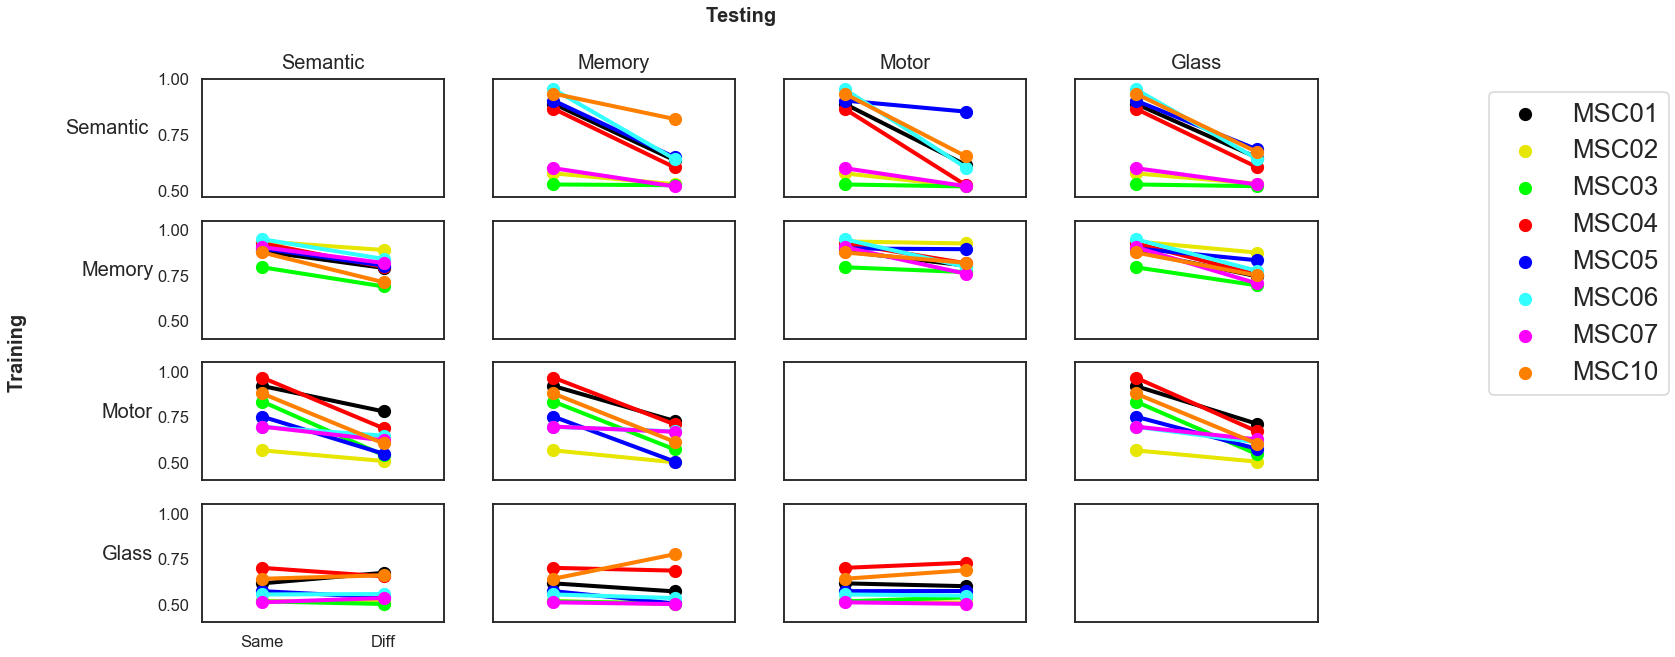

In [111]:
#DT permutation across task 
from matplotlib.lines import Line2D
 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.01, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')

#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Glass', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(2.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)

#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)

#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)


#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Glass', rotation=0, fontsize=20, labelpad=30)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.setp(ax13.get_xticklabels(), visible=False)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.setp(ax14.get_xticklabels(), visible=False)

#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)

plt.savefig(thisDir+'output/mL_allTask/images/ridge/figs/DT_DSmBS_plots.png', bbox_inches='tight')


